In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, MaxAbsScaler
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [3]:
url_file = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
columns = ['frequency',
           'angle_of_attack', 
           'chord_length', 
           'free_stream_velocity',
           'suction_side_displacement_thickness',
           'scaled_sound_pressure_level']

df = pd.read_csv(url_file, sep='\t', header=None, names=columns)

In [4]:
df.head()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.tail()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224
1502,6300,15.6,0.1016,39.6,0.052849,104.204


In [6]:
df.describe()

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_side_displacement_thickness,scaled_sound_pressure_level
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   frequency                            1503 non-null   int64  
 1   angle_of_attack                      1503 non-null   float64
 2   chord_length                         1503 non-null   float64
 3   free_stream_velocity                 1503 non-null   float64
 4   suction_side_displacement_thickness  1503 non-null   float64
 5   scaled_sound_pressure_level          1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [8]:
def preprocess_input(df):
    
    train_data = df.copy()
    train_set = train_data.drop("scaled_sound_pressure_level", axis = 1)
    train_labels = train_data["scaled_sound_pressure_level"].copy()
    
    train_set = QuantileTransformer(random_state=0).fit_transform(train_set)
    train_set = MaxAbsScaler().fit_transform(train_set)
    train_set = StandardScaler().fit_transform(train_set)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(train_set, train_labels, test_size=0.3)
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = preprocess_input(df)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1052, 5)
(451, 5)
(1052,)
(451,)


In [11]:
model = Sequential()

model.add(Input(X_train.shape[1],))

model.add(Dense(48, activation = 'relu'))

model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [13]:
model.fit(x=X_train, y=y_train, epochs=1000, batch_size=64, validation_data=(X_test,y_test))

Epoch 1/1000
17/17 [==============================] - 1s 9ms/step - loss: 15529.8271 - root_mean_squared_error: 124.6187 - val_loss: 15455.0410 - val_root_mean_squared_error: 124.3183
Epoch 2/1000
17/17 [==============================] - 0s 3ms/step - loss: 15441.4160 - root_mean_squared_error: 124.2635 - val_loss: 15364.7969 - val_root_mean_squared_error: 123.9548
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 15349.0479 - root_mean_squared_error: 123.8913 - val_loss: 15270.0146 - val_root_mean_squared_error: 123.5719
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 15251.1240 - root_mean_squared_error: 123.4954 - val_loss: 15167.4658 - val_root_mean_squared_error: 123.1563
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 15144.5674 - root_mean_squared_error: 123.0633 - val_loss: 15056.3291 - val_root_mean_squared_error: 122.7042
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 15028.

Epoch 46/1000
17/17 [==============================] - 0s 3ms/step - loss: 3210.8108 - root_mean_squared_error: 56.6640 - val_loss: 3092.3398 - val_root_mean_squared_error: 55.6088
Epoch 47/1000
17/17 [==============================] - 0s 2ms/step - loss: 2997.7546 - root_mean_squared_error: 54.7518 - val_loss: 2886.8232 - val_root_mean_squared_error: 53.7292
Epoch 48/1000
17/17 [==============================] - 0s 2ms/step - loss: 2799.2278 - root_mean_squared_error: 52.9077 - val_loss: 2695.5403 - val_root_mean_squared_error: 51.9186
Epoch 49/1000
17/17 [==============================] - 0s 2ms/step - loss: 2614.9492 - root_mean_squared_error: 51.1366 - val_loss: 2516.2559 - val_root_mean_squared_error: 50.1623
Epoch 50/1000
17/17 [==============================] - 0s 2ms/step - loss: 2442.6780 - root_mean_squared_error: 49.4235 - val_loss: 2351.4858 - val_root_mean_squared_error: 48.4921
Epoch 51/1000
17/17 [==============================] - 0s 3ms/step - loss: 2284.1719 - root_mea

Epoch 137/1000
17/17 [==============================] - 0s 2ms/step - loss: 218.4005 - root_mean_squared_error: 14.7784 - val_loss: 200.8270 - val_root_mean_squared_error: 14.1713
Epoch 138/1000
17/17 [==============================] - 0s 3ms/step - loss: 215.0818 - root_mean_squared_error: 14.6657 - val_loss: 197.7008 - val_root_mean_squared_error: 14.0606
Epoch 139/1000
17/17 [==============================] - 0s 2ms/step - loss: 211.7239 - root_mean_squared_error: 14.5507 - val_loss: 194.5571 - val_root_mean_squared_error: 13.9484
Epoch 140/1000
17/17 [==============================] - 0s 3ms/step - loss: 208.4378 - root_mean_squared_error: 14.4374 - val_loss: 191.6579 - val_root_mean_squared_error: 13.8441
Epoch 141/1000
17/17 [==============================] - 0s 3ms/step - loss: 205.3250 - root_mean_squared_error: 14.3292 - val_loss: 188.7632 - val_root_mean_squared_error: 13.7391
Epoch 142/1000
17/17 [==============================] - 0s 3ms/step - loss: 202.1837 - root_mean_squ

17/17 [==============================] - 0s 3ms/step - loss: 76.7900 - root_mean_squared_error: 8.7630 - val_loss: 72.2635 - val_root_mean_squared_error: 8.5008
Epoch 229/1000
17/17 [==============================] - 0s 2ms/step - loss: 76.0641 - root_mean_squared_error: 8.7215 - val_loss: 71.6051 - val_root_mean_squared_error: 8.4620
Epoch 230/1000
17/17 [==============================] - 0s 3ms/step - loss: 75.3736 - root_mean_squared_error: 8.6818 - val_loss: 71.0424 - val_root_mean_squared_error: 8.4287
Epoch 231/1000
17/17 [==============================] - 0s 2ms/step - loss: 74.7095 - root_mean_squared_error: 8.6435 - val_loss: 70.3156 - val_root_mean_squared_error: 8.3854
Epoch 232/1000
17/17 [==============================] - 0s 2ms/step - loss: 74.0125 - root_mean_squared_error: 8.6031 - val_loss: 69.7360 - val_root_mean_squared_error: 8.3508
Epoch 233/1000
17/17 [==============================] - 0s 2ms/step - loss: 73.3330 - root_mean_squared_error: 8.5635 - val_loss: 68.96

17/17 [==============================] - 0s 2ms/step - loss: 38.0861 - root_mean_squared_error: 6.1714 - val_loss: 35.9703 - val_root_mean_squared_error: 5.9975
Epoch 321/1000
17/17 [==============================] - 0s 2ms/step - loss: 37.8726 - root_mean_squared_error: 6.1541 - val_loss: 35.9314 - val_root_mean_squared_error: 5.9943
Epoch 322/1000
17/17 [==============================] - 0s 2ms/step - loss: 37.6228 - root_mean_squared_error: 6.1337 - val_loss: 35.6366 - val_root_mean_squared_error: 5.9696
Epoch 323/1000
17/17 [==============================] - 0s 2ms/step - loss: 37.3803 - root_mean_squared_error: 6.1139 - val_loss: 35.3911 - val_root_mean_squared_error: 5.9490
Epoch 324/1000
17/17 [==============================] - 0s 2ms/step - loss: 37.1997 - root_mean_squared_error: 6.0992 - val_loss: 35.0781 - val_root_mean_squared_error: 5.9227
Epoch 325/1000
17/17 [==============================] - 0s 2ms/step - loss: 36.9105 - root_mean_squared_error: 6.0754 - val_loss: 34.88

17/17 [==============================] - 0s 2ms/step - loss: 18.8182 - root_mean_squared_error: 4.3380 - val_loss: 17.5505 - val_root_mean_squared_error: 4.1893
Epoch 413/1000
17/17 [==============================] - 0s 3ms/step - loss: 18.6967 - root_mean_squared_error: 4.3240 - val_loss: 17.6260 - val_root_mean_squared_error: 4.1983
Epoch 414/1000
17/17 [==============================] - 0s 2ms/step - loss: 18.5187 - root_mean_squared_error: 4.3033 - val_loss: 17.3590 - val_root_mean_squared_error: 4.1664
Epoch 415/1000
17/17 [==============================] - 0s 2ms/step - loss: 18.3827 - root_mean_squared_error: 4.2875 - val_loss: 17.1960 - val_root_mean_squared_error: 4.1468
Epoch 416/1000
17/17 [==============================] - 0s 2ms/step - loss: 18.2344 - root_mean_squared_error: 4.2702 - val_loss: 17.0465 - val_root_mean_squared_error: 4.1287
Epoch 417/1000
17/17 [==============================] - 0s 2ms/step - loss: 18.1193 - root_mean_squared_error: 4.2567 - val_loss: 16.98

17/17 [==============================] - 0s 2ms/step - loss: 11.3502 - root_mean_squared_error: 3.3690 - val_loss: 11.0603 - val_root_mean_squared_error: 3.3257
Epoch 505/1000
17/17 [==============================] - 0s 2ms/step - loss: 11.3024 - root_mean_squared_error: 3.3619 - val_loss: 10.9502 - val_root_mean_squared_error: 3.3091
Epoch 506/1000
17/17 [==============================] - 0s 2ms/step - loss: 11.2739 - root_mean_squared_error: 3.3577 - val_loss: 10.9551 - val_root_mean_squared_error: 3.3098
Epoch 507/1000
17/17 [==============================] - 0s 2ms/step - loss: 11.1866 - root_mean_squared_error: 3.3446 - val_loss: 10.8271 - val_root_mean_squared_error: 3.2905
Epoch 508/1000
17/17 [==============================] - 0s 2ms/step - loss: 11.1915 - root_mean_squared_error: 3.3454 - val_loss: 10.8652 - val_root_mean_squared_error: 3.2962
Epoch 509/1000
17/17 [==============================] - 0s 2ms/step - loss: 11.1487 - root_mean_squared_error: 3.3390 - val_loss: 10.82

Epoch 551/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.8766 - root_mean_squared_error: 3.1427 - val_loss: 9.8159 - val_root_mean_squared_error: 3.1330
Epoch 552/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.8379 - root_mean_squared_error: 3.1365 - val_loss: 9.7784 - val_root_mean_squared_error: 3.1270
Epoch 553/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.8858 - root_mean_squared_error: 3.1442 - val_loss: 9.8057 - val_root_mean_squared_error: 3.1314
Epoch 554/1000
17/17 [==============================] - 0s 3ms/step - loss: 9.8873 - root_mean_squared_error: 3.1444 - val_loss: 9.7294 - val_root_mean_squared_error: 3.1192
Epoch 555/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.8366 - root_mean_squared_error: 3.1363 - val_loss: 9.7256 - val_root_mean_squared_error: 3.1186
Epoch 556/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.7641 - root_mean_squared_error: 3.1248 - val_loss: 9

17/17 [==============================] - 0s 2ms/step - loss: 9.0948 - root_mean_squared_error: 3.0158 - val_loss: 9.2755 - val_root_mean_squared_error: 3.0456
Epoch 599/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.0585 - root_mean_squared_error: 3.0097 - val_loss: 9.1292 - val_root_mean_squared_error: 3.0215
Epoch 600/1000
17/17 [==============================] - 0s 3ms/step - loss: 9.0642 - root_mean_squared_error: 3.0107 - val_loss: 9.0826 - val_root_mean_squared_error: 3.0137
Epoch 601/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.0555 - root_mean_squared_error: 3.0092 - val_loss: 9.1081 - val_root_mean_squared_error: 3.0180
Epoch 602/1000
17/17 [==============================] - 0s 2ms/step - loss: 9.0292 - root_mean_squared_error: 3.0049 - val_loss: 9.1633 - val_root_mean_squared_error: 3.0271
Epoch 603/1000
17/17 [==============================] - 0s 3ms/step - loss: 9.0016 - root_mean_squared_error: 3.0003 - val_loss: 9.0753 - val_roo

17/17 [==============================] - 0s 2ms/step - loss: 8.2146 - root_mean_squared_error: 2.8661 - val_loss: 8.3111 - val_root_mean_squared_error: 2.8829
Epoch 693/1000
17/17 [==============================] - 0s 2ms/step - loss: 8.2739 - root_mean_squared_error: 2.8764 - val_loss: 8.3663 - val_root_mean_squared_error: 2.8925
Epoch 694/1000
17/17 [==============================] - 0s 2ms/step - loss: 8.2161 - root_mean_squared_error: 2.8664 - val_loss: 8.3481 - val_root_mean_squared_error: 2.8893
Epoch 695/1000
17/17 [==============================] - 0s 2ms/step - loss: 8.2343 - root_mean_squared_error: 2.8696 - val_loss: 8.3041 - val_root_mean_squared_error: 2.8817
Epoch 696/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.1936 - root_mean_squared_error: 2.8624 - val_loss: 8.3732 - val_root_mean_squared_error: 2.8936
Epoch 697/1000
17/17 [==============================] - 0s 3ms/step - loss: 8.2062 - root_mean_squared_error: 2.8646 - val_loss: 8.3791 - val_roo

17/17 [==============================] - 0s 3ms/step - loss: 7.6474 - root_mean_squared_error: 2.7654 - val_loss: 8.1151 - val_root_mean_squared_error: 2.8487
Epoch 787/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.6499 - root_mean_squared_error: 2.7658 - val_loss: 8.0433 - val_root_mean_squared_error: 2.8361
Epoch 788/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.6850 - root_mean_squared_error: 2.7722 - val_loss: 8.1237 - val_root_mean_squared_error: 2.8502
Epoch 789/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.6756 - root_mean_squared_error: 2.7705 - val_loss: 8.0220 - val_root_mean_squared_error: 2.8323
Epoch 790/1000
17/17 [==============================] - 0s 3ms/step - loss: 7.7229 - root_mean_squared_error: 2.7790 - val_loss: 8.0787 - val_root_mean_squared_error: 2.8423
Epoch 791/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.6543 - root_mean_squared_error: 2.7666 - val_loss: 8.0190 - val_roo

17/17 [==============================] - 0s 2ms/step - loss: 7.4381 - root_mean_squared_error: 2.7273 - val_loss: 7.8658 - val_root_mean_squared_error: 2.8046
Epoch 881/1000
17/17 [==============================] - 0s 3ms/step - loss: 7.3729 - root_mean_squared_error: 2.7153 - val_loss: 7.8060 - val_root_mean_squared_error: 2.7939
Epoch 882/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.3593 - root_mean_squared_error: 2.7128 - val_loss: 7.8445 - val_root_mean_squared_error: 2.8008
Epoch 883/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.3574 - root_mean_squared_error: 2.7125 - val_loss: 7.8818 - val_root_mean_squared_error: 2.8075
Epoch 884/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.3546 - root_mean_squared_error: 2.7119 - val_loss: 7.7830 - val_root_mean_squared_error: 2.7898
Epoch 885/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.3752 - root_mean_squared_error: 2.7157 - val_loss: 7.8626 - val_roo

17/17 [==============================] - 0s 3ms/step - loss: 7.1180 - root_mean_squared_error: 2.6680 - val_loss: 7.5603 - val_root_mean_squared_error: 2.7496
Epoch 975/1000
17/17 [==============================] - 0s 3ms/step - loss: 7.1195 - root_mean_squared_error: 2.6682 - val_loss: 7.6317 - val_root_mean_squared_error: 2.7625
Epoch 976/1000
17/17 [==============================] - 0s 3ms/step - loss: 7.1491 - root_mean_squared_error: 2.6738 - val_loss: 7.6665 - val_root_mean_squared_error: 2.7688
Epoch 977/1000
17/17 [==============================] - 0s 3ms/step - loss: 7.1213 - root_mean_squared_error: 2.6686 - val_loss: 7.6370 - val_root_mean_squared_error: 2.7635
Epoch 978/1000
17/17 [==============================] - 0s 2ms/step - loss: 7.0896 - root_mean_squared_error: 2.6626 - val_loss: 7.6447 - val_root_mean_squared_error: 2.7649
Epoch 979/1000
17/17 [==============================] - 0s 3ms/step - loss: 7.1020 - root_mean_squared_error: 2.6650 - val_loss: 7.6010 - val_roo

In [14]:
model.history

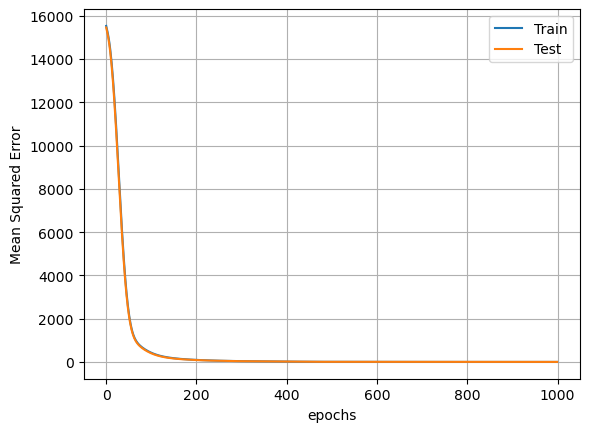

In [15]:
train_loss = model.history.history['loss']
val_loss = model.history.history["val_loss"]
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

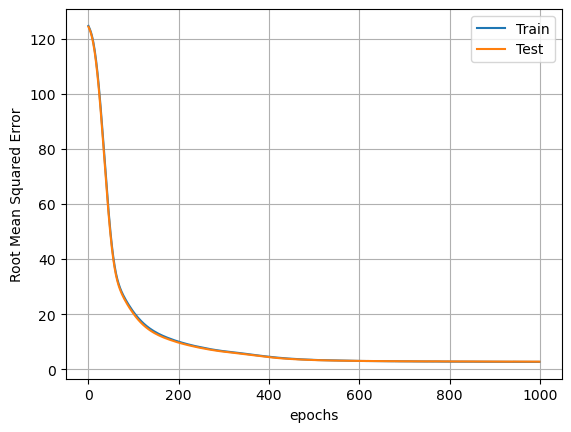

In [16]:
train_loss = model.history.history["root_mean_squared_error"]
val_loss = model.history.history["val_root_mean_squared_error"]
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("epochs")
plt.ylabel("Root Mean Squared Error")
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

In [17]:
# RMSE
score = model.evaluate(X_train, y_train)
train_rmse, train_mse = score[1], score[0]

score = model.evaluate(X_test, y_test)
test_rmse, test_mse = score[1], score[0]

print("Train RMSE = ", train_rmse)
print("Test RMSE = ", test_rmse)
print("---------------------------")

#MSE
print("Train MSE = ", train_mse)
print("Test MSE = ", test_mse)
print("---------------------------")

#R2 Score
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_r2_score = r2_score(y_train, y_train_pred)
test_r2_score = r2_score(y_test, y_test_pred)

print("Train R2 = ", train_r2_score)
print("Test R2 = ", test_r2_score)
print("-----------------------------")

# MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("Train MAE = ", train_mae)
print("Test MAE = ", test_mae)

15/15 [==============================] - 0s 997us/step - loss: 7.5032 - root_mean_squared_error: 2.7392
Train RMSE =  2.644089698791504
Test RMSE =  2.73919677734375
---------------------------
Train MSE =  6.991209983825684
Test MSE =  7.503198623657227
---------------------------
15/15 [==============================] - 0s 714us/step
Train R2 =  0.8517349567779868
Test R2 =  0.845275417862849
-----------------------------
Train MAE =  2.0001840028363937
Test MAE =  2.0746783145473167
